In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
import random

In [2]:
df = pd.read_csv("covid_analytics_clinical_data.csv")

for col in df.columns:
    arr = df[col].to_numpy()
    if isinstance(arr[df[col].first_valid_index()],str):
        if re.search('.*%$', arr[df[col].first_valid_index()]):
            df[col] = (df[col].str.strip('%').astype(float))
        else:
            df[col] = df[col].str.lower()
            arr = df[col].to_numpy()
            arr = pd.unique(arr)
            classifier = np.array([i for i in range(len(arr))])
            df[col]=df[col].replace(arr,classifier)

df = df.fillna(-1)
df

,ID,SUB_ID,Country,Province/State,Study Pop Size (N),Proportion of values entered in row (%),Paper Title,Journal,Author,Source,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,1.0,0.0,0,0,191.0,60.11,0,0,0,0,...,11.52,8.90,1.0,0.26,0,0,0,20.0,0,0
1,1.0,1.0,0,0,54.0,60.11,0,0,0,0,...,37.04,29.63,1.0,0.72,1,0,1,7.5,1,1
2,1.0,2.0,0,0,137.0,60.11,0,0,0,0,...,1.46,0.73,1.0,0.08,2,1,2,20.0,2,2
3,2.0,0.0,0,0,199.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,0,2,3,28.0,3,3
4,2.0,1.0,0,0,99.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,3,3,4,28.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,202.0,2.0,2,56,99.0,23.60,175,40,88,202,...,-1.00,-1.00,1.0,0.32,71,0,28,-1.0,30,42
535,202.0,3.0,2,56,117.0,23.03,175,40,88,202,...,-1.00,-1.00,1.0,0.54,53,13,13,-1.0,24,57
536,202.0,4.0,2,56,247.0,25.84,175,40,88,202,...,-1.00,-1.00,1.0,0.39,47,0,28,-1.0,3,4
537,202.0,5.0,2,56,50.0,25.28,175,40,88,202,...,-1.00,-1.00,1.0,0.42,22,13,28,-1.0,38,25


In [3]:
sampled = df.sample(100)

[0.00637877 0.01742872 0.00356354 0.00764369 0.00615138 0.01923993
 0.0078769  0.00961784 0.00967619 0.00497188 0.00480156 0.00135386
 0.00770136 0.00170161 0.00737398 0.00812301 0.00625044 0.00559233
 0.00731824 0.00138931 0.01152145 0.00973725 0.00573169 0.00416283
 0.00654094 0.00842141 0.00640448 0.01326739 0.00848199 0.00920747
 0.01591062 0.00861684 0.         0.01141576 0.00307293 0.00233925
 0.00484554 0.00292594 0.0027919  0.00414766 0.00478195 0.00326144
 0.00139343 0.00470283 0.00121673 0.00077095 0.00559543 0.00379551
 0.00549934 0.00414454 0.01174698 0.00172267 0.00235772 0.00237137
 0.02035617 0.01062209 0.00837201 0.01334022 0.00663839 0.00529882
 0.0083767  0.00650263 0.00887011 0.00873009 0.00855021 0.00470895
 0.00415358 0.00336061 0.00740371 0.00734632 0.00503746 0.0046083
 0.00398557 0.00619985 0.001156   0.00525369 0.00566773 0.00191519
 0.00305252 0.00291203 0.00297565 0.00019055 0.00669645 0.0064404
 0.00481416 0.00681832 0.00948728 0.00903359 0.0051516  0.005903

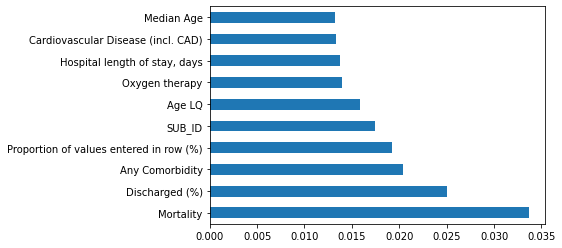

In [4]:

x = sampled.iloc[:, 0:161]
y = sampled.iloc[:, -1]
y = y.astype('int')

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

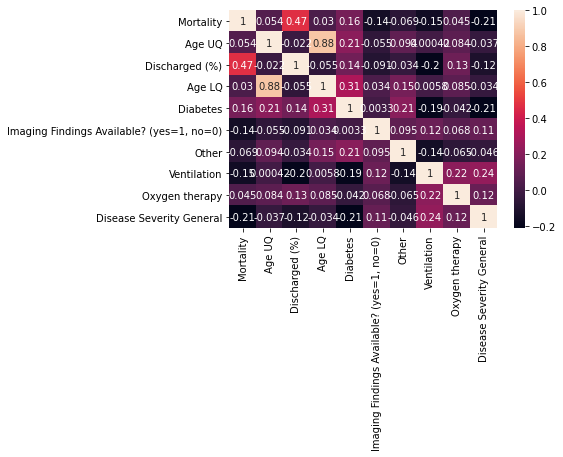

In [5]:
"""
Prints the correlation matrix
"""
corrMatrix = df.corr()
sns.heatmap(df[["Mortality", "Age UQ", "Discharged (%)", "Age LQ", "Diabetes", "Imaging Findings Available? (yes=1, no=0)", "Other", "Ventilation", "Oxygen therapy", "Disease Severity General"]].corr(), annot=True)
plt.show()

In [6]:
new_df = np.array(sampled[['Mortality','Discharged (%)','Survivors', 'End-point vs Active', 'Any Comorbidity']])

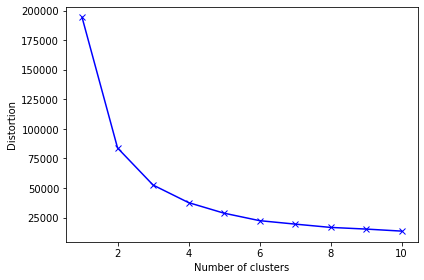

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [8]:
km = KMeans(3)

km.fit(new_df)


KMeans(n_clusters=3)

In [9]:
x = np.nan_to_num(new_df)

In [11]:
#uses the pca algorithm to be able to easily plot the kmeans


pca = PCA(n_components=2)

pca_components = pca.fit_transform(x)

labels = km.labels_

In [12]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-23.162168,-11.812063
1,27.643937,-15.609151
2,-28.532962,13.025523
3,11.523866,4.896285
4,-33.867342,36.396089


In [13]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-23.162168,-11.812063,1
1,27.643937,-15.609151,2
2,-28.532962,13.025523,0
3,11.523866,4.896285,1
4,-33.867342,36.396089,0


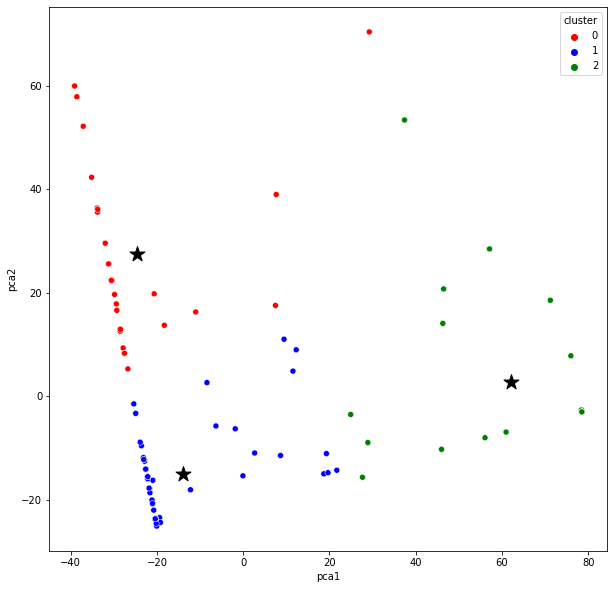

In [14]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'green'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [15]:
#Set up data for train
x = new_df
y = np.array(sampled['Projected Mortality (accounting for patients not currently discharged)'])
y = y.astype('int')


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df, y,train_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)

In [17]:
data = {'y_Actual': Y_test, 'y_Predicted': predicted}

data = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
data

,y_Actual,y_Predicted
0,7,7
1,47,7
2,1,1
3,2,0
4,7,14
...,...,...
75,2,7
76,7,48
77,2,0
78,7,7


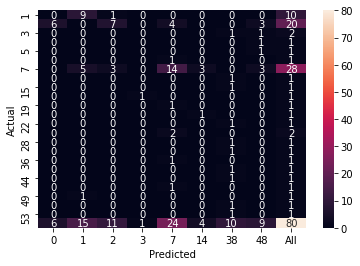

In [18]:
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins= True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()
